<a href="https://colab.research.google.com/github/Muskuu1109/EDA-ASSIGNMENT/blob/main/EDA_on_spotify.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Missing values per column:
 Artist           0
Track Name       0
Popularity       0
Duration (ms)    0
Track ID         0
dtype: int64


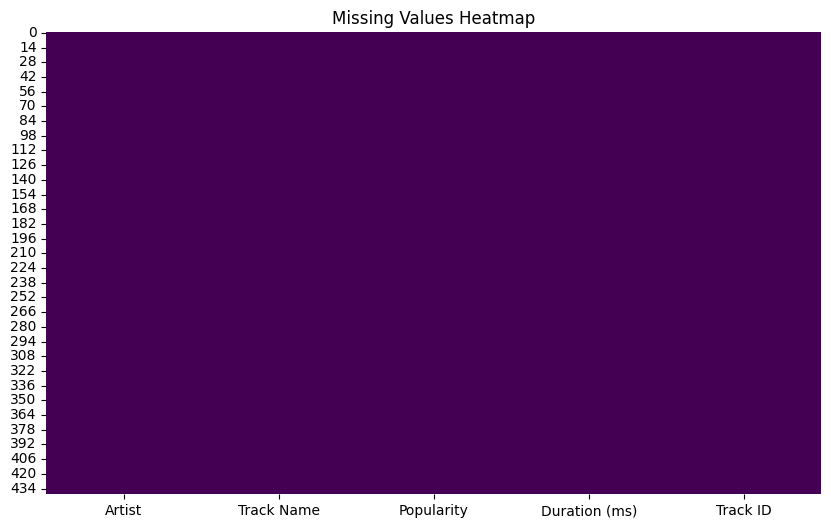


Duplicate rows in dataset:
               Artist                                         Track Name  \
39      Travis Scott                             MELTDOWN (feat. Drake)   
52      Travis Scott                   TELEKINESIS (feat. SZA & Future)   
72         21 Savage                                            née-nah   
73             Drake                      Jimmy Cooks (feat. 21 Savage)   
76             Drake                                          Rich Flex   
131            Drake               First Person Shooter (feat. J. Cole)   
170     Metro Boomin            Trance (with Travis Scott & Young Thug)   
182   D-Block Europe                                           Overseas   
210      Post Malone      Sunflower - Spider-Man: Into the Spider-Verse   
212     Metro Boomin  Annihilate (Spider-Man: Across the Spider-Vers...   
222          Cardi B                    WAP (feat. Megan Thee Stallion)   
224          Cardi B                 Bongos (feat. Megan Thee Stallion)

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv("spotify.csv")  # Replace with your file path

# Check for missing values
missing_values = df.isnull().sum()
print("Missing values per column:\n", missing_values)

# Visualizing missing values with a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=False, cmap="viridis")
plt.title("Missing Values Heatmap")
plt.show()

# Check for duplicate rows
duplicate_rows = df[df.duplicated()]
print("\nDuplicate rows in dataset:\n", duplicate_rows)

# Removing duplicates
df.drop_duplicates(inplace=True)
print("\nDuplicates removed! Proceeding with clean data.")

In [7]:
# Display all column names in the dataset
print("Column names in the dataset:\n", df.columns)

Column names in the dataset:
 Index(['Artist', 'Track Name', 'Popularity', 'Duration (ms)', 'Track ID'], dtype='object')


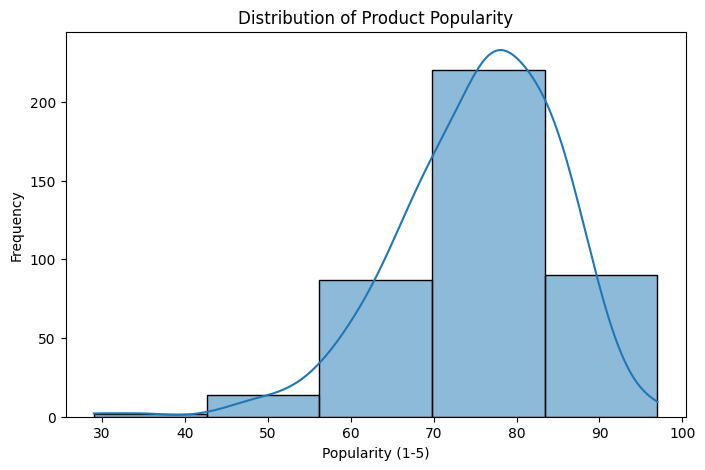

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot histogram of product ratings
plt.figure(figsize=(8, 5))
sns.histplot(df["Popularity"], bins=5, kde=True)

plt.title("Distribution of Product Popularity")
plt.xlabel("Popularity (1-5)")
plt.ylabel("Frequency")
plt.show()

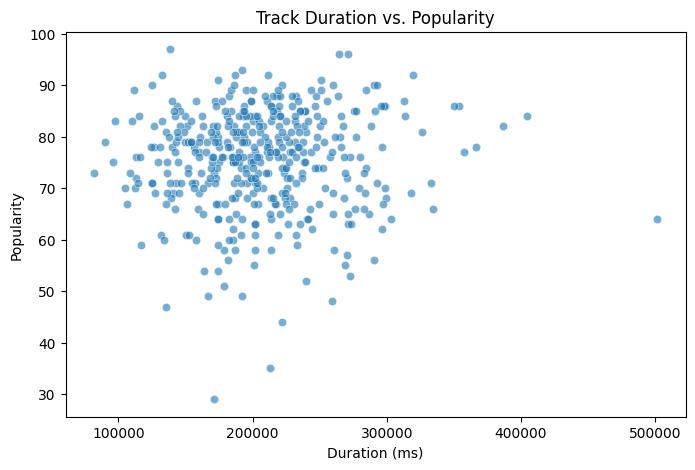

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# Scatter plot for track duration vs. popularity
plt.figure(figsize=(8, 5))
sns.scatterplot(x=df["Duration (ms)"], y=df["Popularity"], alpha=0.6)

plt.title("Track Duration vs. Popularity")
plt.xlabel("Duration (ms)")
plt.ylabel("Popularity")
plt.show()

<ipython-input-13-e629d7866805>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df["Artist"], order=df["Artist"].value_counts().index[:10], palette="coolwarm")


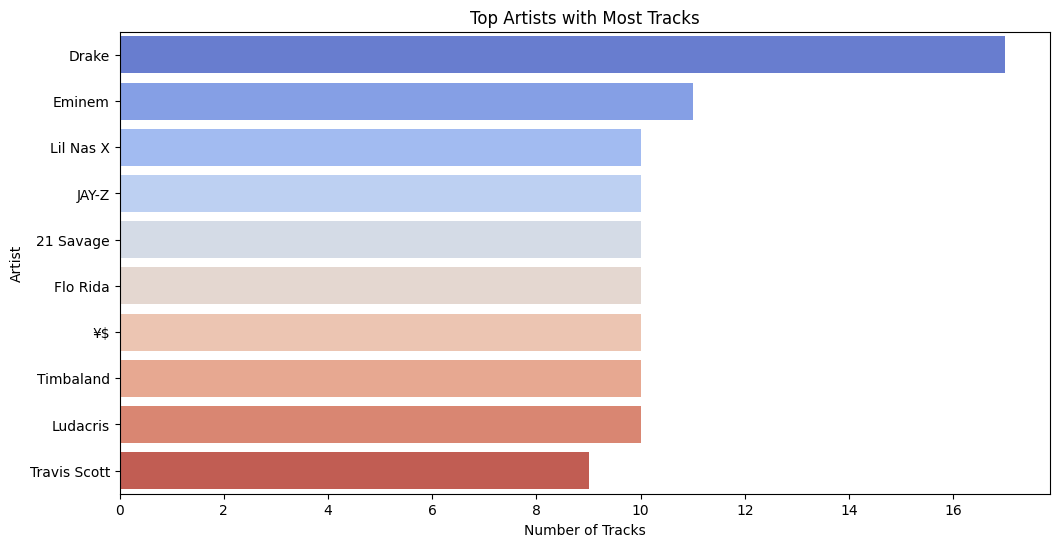

In [13]:
plt.figure(figsize=(12, 6))
sns.countplot(y=df["Artist"], order=df["Artist"].value_counts().index[:10], palette="coolwarm")

plt.title("Top Artists with Most Tracks")
plt.xlabel("Number of Tracks")
plt.ylabel("Artist")
plt.show()

In [18]:
least_popular_tracks = df.sort_values(by="Popularity", ascending=True).head(5)[["Artist", "Track Name", "Popularity"]]
print("Top 5 Least Popular Tracks:")
print(least_popular_tracks)

Top 5 Least Popular Tracks:
             Artist                     Track Name  Popularity
207          Pressa  Attachments (feat. Coi Leray)          29
231   Justin Bieber                     Intentions          35
413  French Montana                Splash Brothers          44
225        Lil Baby                  On Me - Remix          47
407     Wyclef Jean      911 (feat. Mary J. Blige)          48


In [19]:
# Find the top 5 most popular artists
top_artists = df.groupby("Artist")["Popularity"].mean().sort_values(ascending=False).head(5)

print("Top 5 Most Popular Artists by Average Popularity:")
print(top_artists)

Top 5 Most Popular Artists by Average Popularity:
Artist
cassö           92.000000
Trueno          89.000000
David Guetta    87.000000
Travis Scott    86.555556
¥$              85.100000
Name: Popularity, dtype: float64


In [20]:
top_artist_tracks = df[df["Artist"].isin(top_artists.index)].groupby("Artist")[["Track Name", "Popularity"]].max()

print("Most Popular Tracks for Top 5 Artists:")
print(top_artist_tracks)

Most Popular Tracks for Top 5 Artists:
                                Track Name  Popularity
Artist                                                
David Guetta            Baby Don't Hurt Me          87
Travis Scott                    goosebumps          93
Trueno        Mamichula - con Nicki Nicole          89
cassö                                Prada          92
¥$                                VULTURES          96


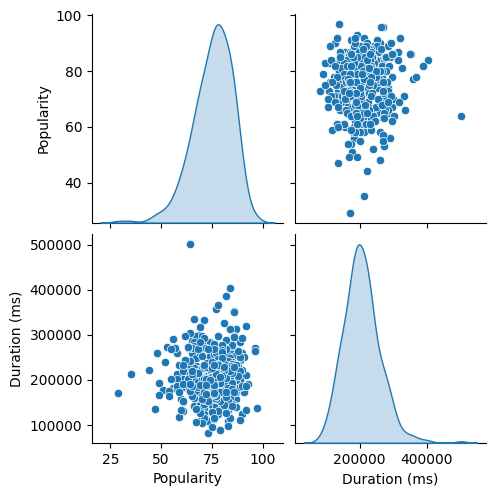

In [22]:
sns.pairplot(df[["Artist", "Track Name", "Popularity", "Duration (ms)", "Track ID"]], diag_kind="kde")
plt.show()

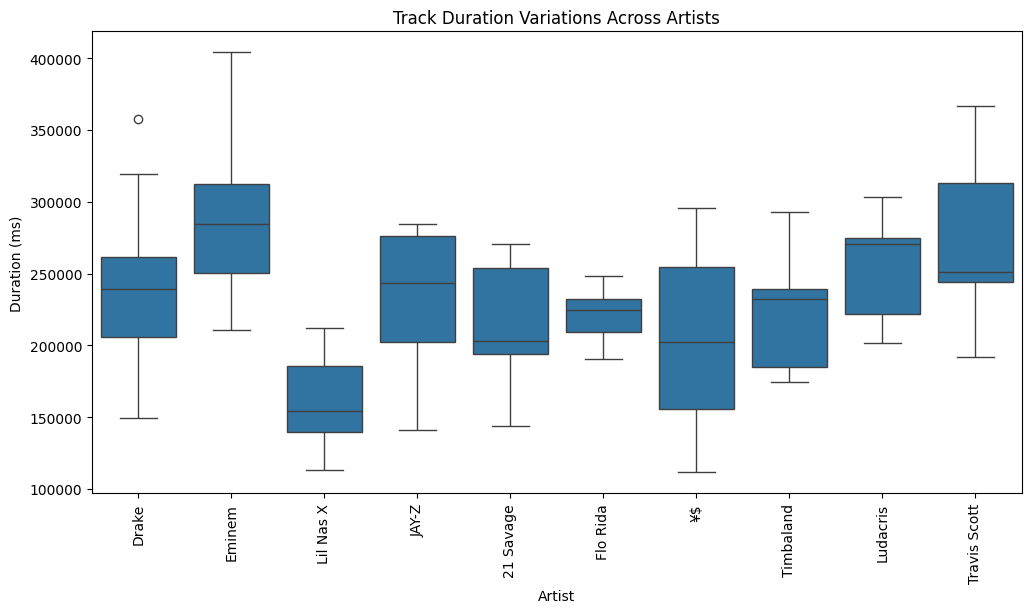

In [23]:
plt.figure(figsize=(12, 6))
sns.boxplot(x=df["Artist"], y=df["Duration (ms)"], order=df["Artist"].value_counts().index[:10])

plt.xticks(rotation=90)
plt.title("Track Duration Variations Across Artists")
plt.xlabel("Artist")
plt.ylabel("Duration (ms)")
plt.show()

<ipython-input-24-3c16cb6979e2>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x=df["Artist"], y=df["Popularity"], order=df["Artist"].value_counts().index[:10], palette="coolwarm")


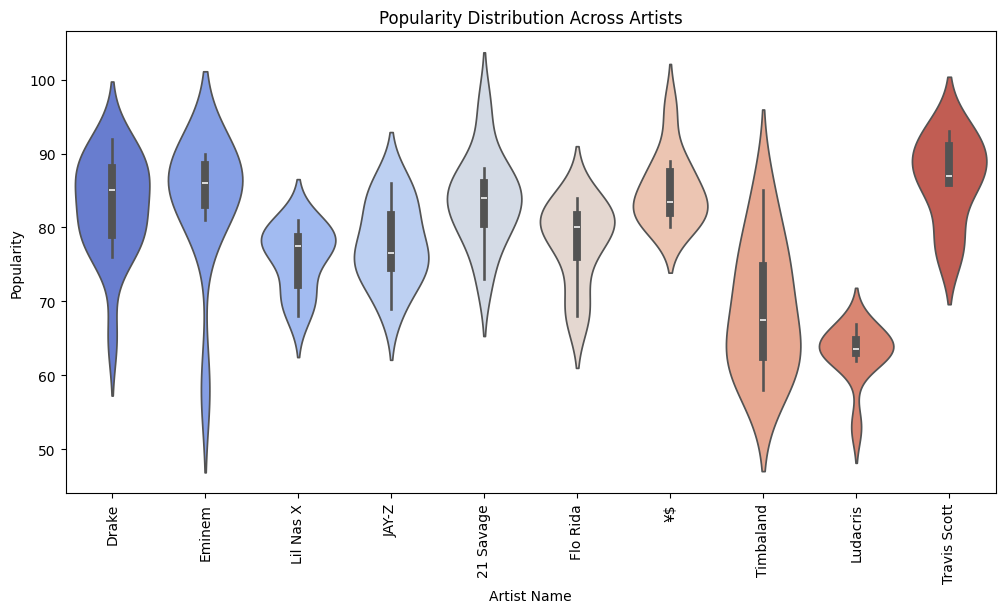

In [24]:
plt.figure(figsize=(12, 6))
sns.violinplot(x=df["Artist"], y=df["Popularity"], order=df["Artist"].value_counts().index[:10], palette="coolwarm")

plt.xticks(rotation=90)
plt.title("Popularity Distribution Across Artists")
plt.xlabel("Artist Name")
plt.ylabel("Popularity")
plt.show()